In [ ]:
#rsync -avP cx1:~/HPC_data/pickled_data/TU_phase_gap_gapless_line.pickle ~/HPC_data/pickled_data/

In [2]:
%load_ext autoreload
%autoreload 2
%run ~/FKMC/notebooks/notebook_preamble.py
%matplotlib inline

np.seterr(under = 'ignore')
from time import time

columnwidth = 246/72.27

plt.rc('font', family='sans-serif')
plt.rc('figure', dpi=200) #makes the plots display larger in the jupyter view
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8, direction='in', bottom=True, top=True)
plt.rc('ytick', labelsize=8, direction='in', left=True, right=True)
plt.rc('axes', labelsize=8)
plt.rc('figure', autolayout=False)

#data_location = Path('/data/users/tch14/pickled_data')
#figure_location = Path('/home/tch14/workspace/fake_home/Dropbox/Apps/Overleaf/Short Paper/figs')

data_location = Path('~/HPC_data/pickled_data').expanduser()
#figure_location = Path('~/DropBox/Apps/Overleaf/Short Paper/figs/').expanduser()
figure_location = Path('~/git/FK_short_paper/figs').expanduser()


from matplotlib.colors import to_rgba

colors = list(map(to_rgba, """
#55115c
#821760
#ab275e
#cd4158
#e7624f
#f88646
#ffad40
#ffd547
""".strip().split('\n'))) #https://learnui.design/tools/data-color-picker.html#palette

colors10 = list(map(to_rgba, """
#55115c
#7d1560
#a1225f
#c1375b
#db5154
#eb694d
#f78347
#fe9d42
#ffb941
#ffd547
""".strip().split('\n'))) #https://learnui.design/tools/data-color-picker.html#palette

#make a colormap from the colors
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("mycmap", colors)

Imported pathlib::Path, os, munch::Munch, pickle, logging, itertools::count, matplotlib::colors
Names are pyplot = plt, matplotlib = mpl, numpy = np


[ 10  20  30  50  70 110 160 250]


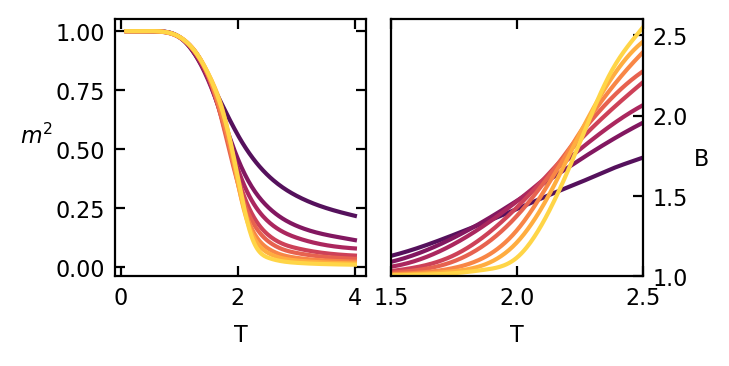

In [9]:
import pickle
from itertools import count
from scipy.interpolate import interp1d, UnivariateSpline

with open(data_location / 'binder_data.pickle', 'rb') as file: 
    d = oBinder = Munch(pickle.load(file))
print(d.Ns)

def binder(ax):
    for i, N, c in zip(count(), d.Ns, colors):
        d.dB[i] = np.maximum(d.dB[i], d.dB[i].mean() * 0.1)
        binder_interped = UnivariateSpline(d.BX, d.B[i], w = 1/d.dB[i], s = len(d.BX))
        #ax.plot(d.BX, d.B[i], label = f'N = {N}', linewidth = 1, color = c)

        #spread(ax, d.MX, d.M2[i], d.dM2[i], alpha = 0.3, label = f'N = {N}', color = color)

        #plot the binder cumulant
        #ax.errorbar(d.BX, d.B[i], yerr = d.dB[i], color = c, linestyle = "None", marker = '.')
        #ax.plot(d.BX, d.B[i], label = f'N = {N}', color = c)

        x = np.linspace(d.BX[0], d.BX[-1], 200)
        ax.plot(x, binder_interped(x), color = c)
        
        ax.set_ylabel('B', rotation=0, labelpad=5)
        ax.set_xlabel('T', rotation=0, labelpad=5)
        
def orderparam(ax):
    for i, N, c in zip(count(), d.Ns, colors):
        d.dM2[i] = np.maximum(d.dM2[i], d.dM2[i].mean() * 0.1)
        M_interped = UnivariateSpline(d.MX, d.M2[i], w = 1/(d.dM2[i] + 0.01*max(d.dM2[i])), s = len(d.MX))
        #axes[0].plot(d.MX, d.M2[i], linewidth = 1, color = c)
        #axes[0].errorbar(d.MX, d.M2[i], yerr = d.dM2[i] * 2, color = c, linestyle = "None", marker = '|', markersize = 0.5, label = f'N = {N}')

        x = np.linspace(d.MX[0], d.MX[-1], 200)
        ax.plot(x, M_interped(x), color = c)
        #spread(axes[0], d.MX, d.M2[i], d.dM2[i], alpha = 0.3, label = f'N = {N}', color = color)
        
        ax.set_ylabel('$m^2$', rotation=0, labelpad=7)
        ax.set_xlabel('T', rotation=0, labelpad=5)

f, axes = plt.subplots(1,2, gridspec_kw = dict(wspace = 0.1))
        
orderparam(axes[0])
binder(axes[1])
    

axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")


axes[1].set(xlim = (1.5,2.5), ylim = (1,2.6));
    

width = columnwidth
height =  columnwidth / 2
f.set_size_inches(width, height)
f.savefig(figure_location / 'binder_plot.eps', bbox_inches='tight')

o.Ns = [ 60. 120. 270.]
N1 = 270.0, N2 = 60.0


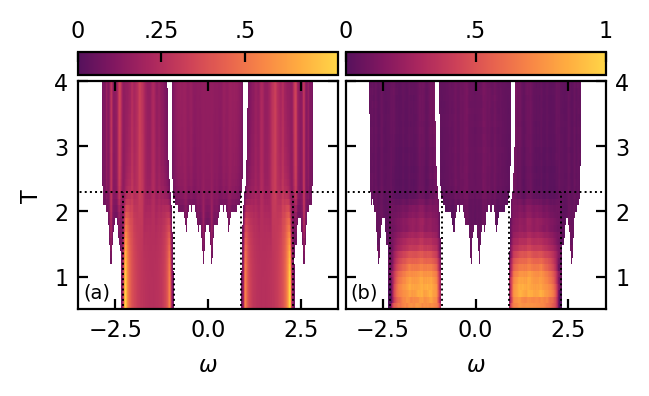

In [89]:
with open(Path('~/HPC_data/pickled_data/gap_opening.pickle').expanduser(), 'rb') as file:
    o = pickle.load(file)

from FKMC.general import smooth

#f, (caxes, axes) = plt.subplots(2,3, gridspec_kw = dict(wspace = 0.05, hspace = 0.05, height_ratios = (1,10), width_ratios = (5,5,1)))
#caxes[-1].set(visible = False)    

f, (caxes, axes) = plt.subplots(2,2, gridspec_kw = dict(wspace = 0.03,
                                                        hspace = 0.05,
                                                        height_ratios = (1,10),
                                                        width_ratios = (1,1)))

#f = plt.figure(constrained_layout=False)
#gs = f.add_gridspec(2, 5, 
#                    width_ratios=[0.1, 1, 0.1, 1, 0.2],
#                    height_ratios = (1,10),
#                    wspace = 0.05, hspace = 0.05)
#axes = [f.add_subplot(gs[1, 0:2]), f.add_subplot(gs[1, 2:4]), f.add_subplot(gs[1, 4])]
#caxes = [f.add_subplot(gs[0, 1:2]), f.add_subplot(gs[0, 3:4])]
#label_axes = [f.add_subplot(gs[0, 0]), f.add_subplot(gs[0, 2])]

#for label, ax in zip(["a","b"], label_axes):
#    ax.set(visible = False)
#    (x0,y0), (x1, y1) = ax.get_position().get_points()
#    rect = mpl.patches.Rectangle((x0,y0),x1-x0,y1-y0,
#                             linewidth=0.7,
#                             edgecolor='k',
#                             facecolor='none',
#                             transform = f.transFigure)
#    f.add_artist(rect)
#    
#    f.text(0.5, 0.5, label, transform=ax.transAxes, va='center', ha='center',
#            fontsize=7, fontweight='normal', color = 'black')

#plot the E-T DOS Diagram

ax = axes[0]

#plot the m2 plot
#for i, N in enumerate(o.Ns): axes[2].plot(o.Mf_moments.mean(axis = 1)[i, :, 2], o.Ts, linewidth = 0.5, color = 'k', linestyle = 'dotted')
#axes[2].set(xlabel = '$m^2$')
    
print(f'o.Ns = {o.Ns}')
i1 = 2; i2 = 0
N1 = o.Ns[i1]; N2 = o.Ns[i2]
print(f'N1 = {N1}, N2 = {N2}')

I1 = smooth(o.IPR[i1].mean(axis = 0), scale = 0.5, axis = -1)
I2 = smooth(o.IPR[i2].mean(axis = 0), scale = 0.5, axis = -1)

E_i = 2
E_threshold = 0.07
E = smooth(o.DOS[E_i].mean(axis = 0), scale = 0.5, axis = -1)
E = np.where(E > 0.07, E, np.NaN)

#I = (I2 - I1)/I2 * 100
#I = np.log(I1/I2)/np.log(N2/N1)
I = -o.m
I = np.where(E > 0.07, I, np.NaN)

norm = mpl.colors.Normalize(vmin = 0)
custom_cmap.set_bad(color='white')
pcol = ax.pcolormesh(o.E_bins, o.Ts, E, norm = norm, cmap=custom_cmap, linewidth=0, rasterized = True)
ax.set(ylabel = 'T', xlabel = '$\omega$', ylim = (0.1, 4), xlim = (-4, 4))
cbar = f.colorbar(pcol, cax = caxes[0], orientation="horizontal")
caxes[0].set_label(f'DOS (N = {o.Ns[E_i]})')

cbar.set_ticks([0, .25, .5])
cbar.set_ticklabels(['0', '.25', '.5'])

#plot the E-T IPR diagram Diagram
ax = axes[1]
norm = mpl.colors.Normalize(vmin=0, vmax=1)
pcol = ax.pcolormesh(o.E_bins, o.Ts, I, norm = norm, cmap= custom_cmap, linewidth=0, rasterized = True)
cbar = f.colorbar(pcol, cax = caxes[1], orientation="horizontal")
cbar.set_ticks([0, .5, 1])
cbar.set_ticklabels(['0', '.5', '1'])

ax.set(xlabel = '$\omega$', )

for a in axes[:2]: 
    a.tick_params(direction = "in")
    a.set(xlim = (-3.5,3.5))
    
for a in axes:
    a.set(ylim = (0.1,4))
   
axes[1].tick_params(labelleft = False)
axes[-1].tick_params(labelleft = False, labelright = True)
    
for cax in caxes: cax.tick_params(bottom = False, top = True, labelbottom = False, labeltop = True)
  
for label, ax, color in zip(["(a)","(b)"], axes, ['k', 'k']):
    ax.text(0.02, 0.03, label, transform=ax.transAxes, va='bottom', ha = 'left',
            fontsize=7, fontweight='normal', color = color)
    
Tc = 2.3
for ax in axes[:2]:
    ax.hlines(y = Tc, xmin = -4, xmax = 4, linewidth = 0.7, linestyle = 'dotted', color = 'k')
    ax.vlines(x = [-2.3, -0.9, 0.9, 2.3], ymin = 0, ymax = Tc, linewidth = 0.7, linestyle = 'dotted', color = 'k')

for ax in axes[:2]: ax.set(ylim = (0.5,4))
    
f.subplots_adjust()
f.set_size_inches(width,height)
f.savefig(figure_location / 'gap_opening.eps', bbox_inches='tight')

In [5]:
def log_params(data):
    print(f'Keys: {", ".join(data.keys())}')
    p = data.parameters
    m = data.MCMC_params
    print('Simulation Parameters')
    print(', '.join(f'{k} : {v}' for k,v in p.items() if k != 'J_matrix'))
    print('MCMC Parameters')
    print(', '.join(f'{k} : {v}' for k,v in m.items()))
    print()

TJ_data:
Keys: Mf_moments, sigma_Mf_moments, E_bins, IPR, DOS, total_jobs, Js, Ts, Ns, repeats, structure_names, parameters, MCMC_params, desc, structure_dims, hints, T
Simulation Parameters
N_sites : 128, t : 1, alpha : 1.25, mu : 0, beta : 10.0, J : 0.0, U : 1, normalise : True
MCMC Parameters
state : None, N_steps : 100000, N_burn_in : 10000, thin : 100, logger : <FKMC.montecarlo.Eigenspectrum_IPR_all object at 0x7fc373bc4b50>, proposal : <function p_multi_site_uniform_reflect at 0x7fc39fd88170>, accept_function : <function perturbation_accept at 0x7fc39fd884d0>, warnings : True


TU_data:
Keys: Mf_moments, sigma_Mf_moments, E_bins, IPR, DOS, total_jobs, Us, Ts, Ns, repeats, structure_names, parameters, MCMC_params, desc, structure_dims, hints, T
Simulation Parameters
N_sites : 128, t : 1, alpha : 1.5, mu : 0, beta : 10.0, J : 5, U : 0.0, normalise : True
MCMC Parameters
state : None, N_steps : 100000, N_burn_in : 10000, thin : 100, logger : <FKMC.montecarlo.Eigenspectrum_IPR_all ob

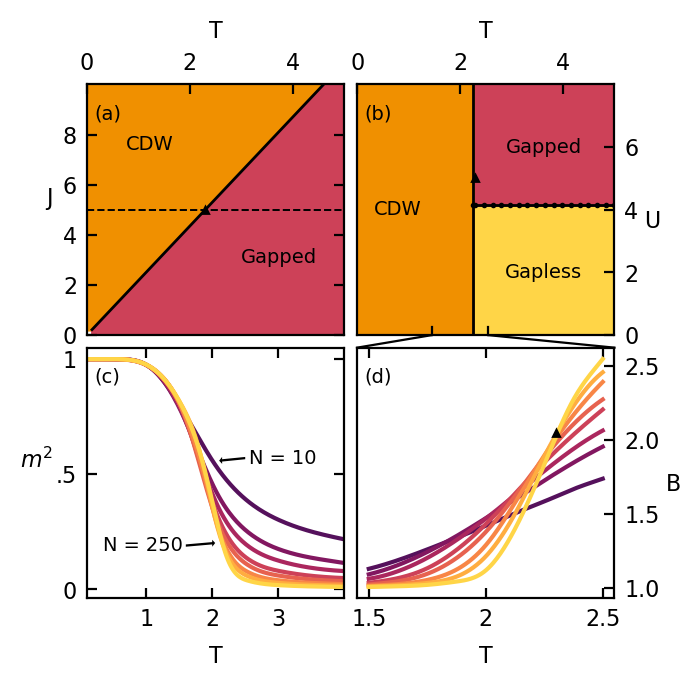

In [79]:
from matplotlib.colors import to_rgba

cdw_color = to_rgba('#f09000')
gapped_color = to_rgba('#00afdb')
gapless_color = to_rgba('#e1a3f0')

#Sohpie's colour scheme
gapped_color = colors[3]
gapless_color = colors[-1]

#gapless_color = '#75c9f0' #light blue
#gapless_color = '#ea623b' #half way between cdw orange and colors[3]

cdw_gapped_midpoint = np.mean([cdw_color, gapped_color], axis = 0)

def TJ_phase_diagram_T(ax):
    with open(data_location / 'TJ_phase_data.pickle', 'rb') as file: 
        TJ_data = pickle.load(file)   
    
    print('TJ_data:')
    log_params(TJ_data)
    print('')
    
    #plot the gradients
    #norm = mpl.colors.Normalize(vmin=0, vmax=1)
    #from matplotlib.colors import LinearSegmentedColormap
    #colors = [(0, 'white'), (1, cdw_color)]
    #cmap = LinearSegmentedColormap.from_list("mycmap", colors)
    #TJ_data.hints.Mf_moments == ('Ns', 'repeats', 'Js', 'Ts', 'moment', 'MCstep')
    #M2 = TJ_data.Mf_moments[-1, :, :, :, 2].mean(axis = (0)).T
    #M4 = TJ_data.Mf_moments[-1, :, :, :, 4].mean(axis = (0)).T
    #plot_binder = False
    #Y = M4 / M2**2 if plot_binder else M2
    #pcol = ax.pcolormesh(TJ_data.Ts, TJ_data.Js, Y.T, cmap = cmap, shading = 'gouraud', norm = norm, linewidth=0, rasterized = True)
    
    crit_line = Munch(Js = 5/2.3*TJ_data.Ts, Ts = TJ_data.Ts)
    
    ax.fill_betweenx(crit_line.Js, x1 = 0, x2 = crit_line.Ts, color = cdw_color)
    ax.fill_between(crit_line.Ts, crit_line.Js, color = gapped_color)
    ax.plot(crit_line.Ts, crit_line.Js,  color = 'black', marker = '.', markersize = 0, linewidth = 1)
    
    #pcol.set_edgecolor('face')
    ax.set(xlim = (0.1, 5), ylim = (0,10))
    ax.set_ylabel('J', rotation=0, labelpad=5)
    ax.set_xlabel('T', rotation=0, labelpad=5)
    
    ax.text(0.15, 0.8, "CDW", transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top')

    ax.text(0.6, 0.35, "Gapped", transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top')

def TU_phase_diagram_T(ax):
    with open( data_location / 'TU_phase_data.pickle', 'rb') as file: 
        TU_data = pickle.load(file)   
        
    with open(data_location / 'TU_phase_gap_gapless_line.pickle', 'rb') as file: 
        gapped_gapless_line = Munch(pickle.load(file))
    
    print('TU_data:')
    log_params(TU_data)
    
    from matplotlib.colors import LinearSegmentedColormap
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    colors = [(1,1,1,1), cdw_color]
    cmap = LinearSegmentedColormap.from_list("mycmap", colors)
    #cmap = "RdBu_r"
    
    
    #TU_data.hints.Mf_moments == ('Ns', 'repeats', 'Us', 'Ts', 'moment', 'MCstep')
    #M2 = TU_data.Mf_moments[-1, :, :, :, 2].mean(axis = (0)).T
    #M4 = TU_data.Mf_moments[-1, :, :, :, 4].mean(axis = (0)).T
    #Y =  M2
    #pcol = ax.pcolormesh(TU_data.Ts, TU_data.Us, Y.T, cmap=cmap, norm = norm, shading = 'gouraud', rasterized = True, linewidth = 0)
    
    Tc = 2.25
    print(Tc)
    
    #
    #norm = mpl.colors.Normalize(vmin=0, vmax=0.1)
    #colors = [(1,1,1,0), gapless_color]
    #cmap = LinearSegmentedColormap.from_list("mycmap", colors)
    #pcol = ax.pcolormesh(TU_data.Ts, TU_data.Us, gapped_gapless_line.percent_low_E_states , cmap = cmap, shading = 'gouraud', rasterized = True, linewidth = 0)
    
    #### Critical Lines ################
    ix = gapped_gapless_line.T > Tc
    gapped_gapless_line.U = np.concatenate([[gapped_gapless_line.U[~ix][-1]], gapped_gapless_line.U[ix]])
    gapped_gapless_line.T = np.concatenate([[Tc,], gapped_gapless_line.T[ix]])
    
    ax.plot(gapped_gapless_line.T, gapped_gapless_line.U, color = 'black', marker = '.', markersize = 2, linewidth = 1)
    ax.plot(Tc*np.ones_like(TU_data.Us), TU_data.Us,  color = 'black', marker = '.', markersize = 0, linewidth = 1)
    
    ax.fill_between(gapped_gapless_line.T, gapped_gapless_line.U, color = gapless_color)
    ax.fill_between(gapped_gapless_line.T, y1 = gapped_gapless_line.U, y2 = 8, color = gapped_color)
    ax.fill_betweenx(TU_data.Us, Tc*np.ones_like(TU_data.Us), color = cdw_color)
    ##### Text ##########################
    
    ax.set_ylabel('U', rotation=0, labelpad=5)
    ax.set_xlabel('T', rotation=0, labelpad=5)
    
    ax.set(ylim = (0,8), xlim = (0.1,5))
    
    ax.text(0.8, 4, "CDW", transform=ax.transData,
            fontsize=7, fontweight='normal', va='center', ha = 'center')

    ax.text((Tc+5)/2, 6, "Gapped", transform=ax.transData,
            fontsize=7, fontweight='normal', va='center', ha = 'center')
    
    ax.text((Tc+5)/2, 2, "Gapless", transform=ax.transData,
        fontsize=7, fontweight='normal', va='center', ha = 'center')
    

f, axes = plt.subplots(2,2, gridspec_kw = dict(wspace = 0.05, hspace = 0.05))
axes = axes.flatten()
    
TJax = axes[0]
TUax = axes[1]
m2ax = axes[2]
binderax = axes[3]


##### The PT diagrams
TJ_phase_diagram_T(TJax)
TU_phase_diagram_T(TUax)
binder(binderax)
orderparam(m2ax)

#the point at the binder crossing
p = Munch(Tc = 2.3, m2 = 0.7, B = 2.05, J = 5, U = 5)
m = Munch(marker = '^', markersize = 2, color = 'black')
binderax.plot([p.Tc,], [p.B,], **m)
TJax.plot([p.Tc,], [p.J,], **m)
TUax.plot([p.Tc,], [p.U,], **m)

#### the M2 plot #####

#The m2 plot
m2ax.set(xlim = (0.1,4),
            xticks = [0,1,2,3],
            yticks = [0, 0.5, 1],
            yticklabels = ['0', '.5', '1']
            )

startx = 1.6; starty = 0.19;
endx = 2; endy = 0.2;
m2ax.arrow(startx, starty, endx-startx, endy-starty, width = 0.01, linewidth = 0.001, color = 'k')
m2ax.text(startx-0.05, starty, 'N = 250', fontsize = 7, ha = 'right', va = 'center')

startx = 2.5; starty = 0.57;
endx = 2.15; endy = 0.56;
m2ax.arrow(startx, starty, endx-startx, endy-starty, width = 0.01, linewidth = 0.001, color = 'k')
m2ax.text(startx+0.05, starty, 'N = 10', fontsize = 7, ha = 'left', va = 'center')

####### The binder plot ###########


######## Things that depend on where the axis is rather than what is on it
axes[0].xaxis.tick_top()
axes[0].xaxis.set_label_position("top")

axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")

axes[1].xaxis.tick_top()
axes[1].xaxis.set_label_position("top")
    
axes[3].yaxis.tick_right()
axes[3].yaxis.set_label_position("right")

  
for letter, ax, c in zip('abcdef...', axes.flatten(), 'kkkk'):
    ax.text(0.03, 0.92, f"({letter})", transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top', color = c)



TJax.hlines(y = 5, xmin = 0, xmax = 5, linestyle = 'dashed', linewidth = 0.7)

#the binder plot
binderax.set(xticks = [1.5, 2, 2.5],
            xticklabels = ['1.5', '2', '2.5'],
           )

#the TJ plot
TJax.set(xlim = (0,5),
            xticks = [0,2,4],
            yticks = [0, 2, 4, 6, 8],
            )

TUax.set(xlim = (0,5),
            xticks = [0,2,4],
            yticks = [0, 2, 4, 6],
            )

#work in figure coords where (0,0) is bottom left and (1,1) top right
(_, _), (_, y0) = binderax.get_position().get_points()
(_, y1), (_, _) = TUax.get_position().get_points()
y2 = y1 + 0.012

dont_care = 0

def datacoords_to_fig(ax, point): 
    trans = ax.transData + f.transFigure.inverted()
    return trans.transform_point(point) #transform to figure coords

import matplotlib.lines as lines

lineargs = dict(
    linewidth=0.8, linestyle=None, color='k', transform = f.transFigure,
)

for xval in binderax.get_xlim():
    (x0, _) = datacoords_to_fig(binderax, (xval, dont_care))
    (x1, _) = datacoords_to_fig(TUax, (xval, dont_care))
    f.add_artist(lines.Line2D([x0, x1], [y0, y1], **lineargs,))
    f.add_artist(lines.Line2D([x1, x1], [y1, y2], **lineargs,))
    
f.set_size_inches(columnwidth, columnwidth)
f.savefig(figure_location / 'phase_diagram2.eps', bbox_inches='tight')

In [7]:
with open(data_location / f'local_runs_processed_smoothed_june2.pickle', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    o_local_runs = Munch(pickle.load(f))

T = 1.5, J = 5, U = 5, M**2 = 0.81
Ns = [ 40  60  70  80 100 120 150 180 220 270]


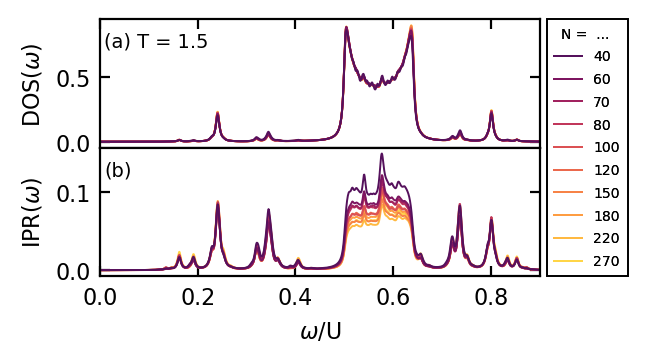

In [12]:
o = o_local_runs[1]
print(f'T = {1 / o.parameters.beta}, J = {o.parameters.J}, U = {o.parameters.U}, M**2 = {o.Mf_moments[-1, :, 2].mean():.2f}')

f = plt.figure(constrained_layout=False)
gs = f.add_gridspec(2, 2, width_ratios=[5, 1], wspace = 0, hspace = 0)
axes = [f.add_subplot(gs[0, :1]), f.add_subplot(gs[1, :1])]
legend_axis = f.add_subplot(gs[:, 1], visible = False)

axes[0].tick_params(axis = 'x', bottom = False, labelbottom = False)
axes[1].tick_params(axis = 'x', top = False, labeltop = False)

linewidth = 0.7

lines = [None for _ in o.Ns]
print(f"Ns = {o.Ns}")
for i,N in list(enumerate(o.Ns))[::-1]:
    lines[i], = axes[0].plot(o.E_bins[1:] / o.parameters.U, o.DOS[i], label = f'N = {N}', color = colors10[i], linewidth = linewidth) 
    axes[1].plot(o.E_bins[1:] / o.parameters.U, o.IPR[i], color = colors10[i], linewidth = linewidth)

for a in axes: a.set(xlim = (0, 0.9))
    
axes[0].set(ylabel = 'DOS($\omega$)')
axes[1].set(ylabel = 'IPR($\omega$)', xlabel = '$\omega$/U')

#axes[0].legend()

for a in axes: a.tick_params(direction = "in")
  
for label, ax in zip([f"(a) T = {1 / o.parameters.beta}","(b)","(c)"], axes):
    ax.text(0.01, 0.9, label, transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top', color = 'black')
    
from matplotlib.legend import Legend
legend_fontsize = 5

#get the x position of the right of the plots in figure coords
_, (x0, _) = axes[0].get_position().get_points()
#get the y position of the bottom of the plots in figure coords
(_, y0), _ = axes[1].get_position().get_points()
#get the top right of the legend axis
_, (x1, y1) = legend_axis.get_position().get_points()

wspace = 0.01
rect = mpl.patches.Rectangle((x0+wspace,y0),x1-x0-wspace,y1-y0,
                             linewidth=0.7,
                             edgecolor='k',
                             facecolor='none',
                             transform = f.transFigure)
f.add_artist(rect)

leg = f.legend(
             handles = lines, 
             labels = [f"{N}" for N in o.Ns],
             frameon=True,
             fontsize = legend_fontsize,
             loc = 'center',
             bbox_to_anchor=rect.get_bbox(),
            labelspacing = 0.63,
           fancybox = False,
           bbox_transform=f.transFigure,
)
#modify the frame of the legend
frame = leg.get_frame()
frame.set(visible = False)

#change the title of the legend
leg.set_title("N =  ... ", prop = dict(size = legend_fontsize))

#add the legend to the figure
f.add_artist(leg);




f.subplots_adjust()
f.set_size_inches(width,height)
f.savefig(figure_location / 'mobility_edge_low_temp.eps', bbox_inches='tight');

T = 2.5, J = 5, U = 5, M**2 = 0.04
Ns = [ 40  60  70  80 100 120 150 180 220 270]


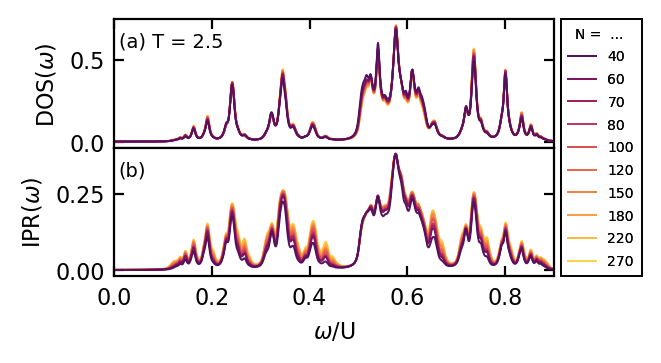

In [15]:
o = o_local_runs[2]
print(f'T = {1 / o.parameters.beta}, J = {o.parameters.J}, U = {o.parameters.U}, M**2 = {o.Mf_moments[-1, :, 2].mean():.2f}')

f = plt.figure(constrained_layout=False)
gs = f.add_gridspec(2, 2, width_ratios=[5, 1], wspace = 0, hspace = 0)
axes = [f.add_subplot(gs[0, :1]), f.add_subplot(gs[1, :1])]
legend_axis = f.add_subplot(gs[:, 1], visible = False)

axes[0].tick_params(axis = 'x', bottom = False, labelbottom = False)
axes[1].tick_params(axis = 'x', top = False, labeltop = False)

linewidth = 0.7

lines = [None for _ in o.Ns]
print(f"Ns = {o.Ns}")
for i,N in list(enumerate(o.Ns))[::-1]:
    lines[i], = axes[0].plot(o.E_bins[1:] / o.parameters.U, o.DOS[i], label = f'N = {N}', color = colors10[i], linewidth = linewidth) 
    axes[1].plot(o.E_bins[1:] / o.parameters.U, o.IPR[i], color = colors10[i], linewidth = linewidth)

for a in axes: a.set(xlim = (0, 0.9))
    
axes[0].set(ylabel = 'DOS($\omega$)')
axes[1].set(ylabel = 'IPR($\omega$)', xlabel = '$\omega$/U')

#axes[0].legend()

for a in axes: a.tick_params(direction = "in")
  
for label, ax in zip([f"(a) T = {1 / o.parameters.beta}","(b)","(c)"], axes):
    ax.text(0.01, 0.9, label, transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top', color = 'black')
    
from matplotlib.legend import Legend
legend_fontsize = 5

#get the x position of the right of the plots in figure coords
_, (x0, _) = axes[0].get_position().get_points()
#get the y position of the bottom of the plots in figure coords
(_, y0), _ = axes[1].get_position().get_points()
#get the top right of the legend axis
_, (x1, y1) = legend_axis.get_position().get_points()

wspace = 0.01
rect = mpl.patches.Rectangle((x0+wspace,y0),x1-x0-wspace,y1-y0,
                             linewidth=0.7,
                             edgecolor='k',
                             facecolor='none',
                             transform = f.transFigure)
f.add_artist(rect)

leg = f.legend(
             handles = lines, 
             labels = [f"{N}" for N in o.Ns],
             frameon=True,
             fontsize = legend_fontsize,
             loc = 'center',
             bbox_to_anchor=rect.get_bbox(),
            labelspacing = 0.63,
           fancybox = False,
           bbox_transform=f.transFigure,
)
#modify the frame of the legend
frame = leg.get_frame()
frame.set(visible = False)

#change the title of the legend
leg.set_title("N =  ... ", prop = dict(size = legend_fontsize))

#add the legend to the figure
f.add_artist(leg);

f.subplots_adjust()
f.set_size_inches(width,height)
f.savefig(figure_location / 'mobility_edge_high_temp.eps', bbox_inches='tight');

T = 2.5, J = 5, U = 5, M**2 = 0.04
T = 2.5, J = 5, U = 5, M**2 = 0.04
Ns = [ 40  60  70  80 100 120 150 180 220 270]


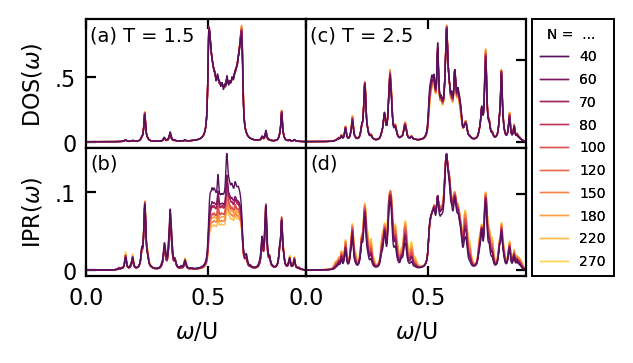

In [16]:
linewidth = 0.5
xlim = (0, 0.9)
legend_fontsize = 5
legend_wspace = 0.01
legend_labelspacing = 0.63
wspace = 0
hspace = 0


o1 = o_local_runs[1]
print(f'T = {1 / o.parameters.beta}, J = {o.parameters.J}, U = {o.parameters.U}, M**2 = {o.Mf_moments[-1, :, 2].mean():.2f}')

o2 = o_local_runs[2]
print(f'T = {1 / o.parameters.beta}, J = {o.parameters.J}, U = {o.parameters.U}, M**2 = {o.Mf_moments[-1, :, 2].mean():.2f}')

f = plt.figure(constrained_layout=False)
gs = f.add_gridspec(2, 3, width_ratios=[1, 1, 0.4], wspace = wspace, hspace = hspace)

axes = np.array([
    [f.add_subplot(gs[0, 0]), f.add_subplot(gs[1, 0])],
    [f.add_subplot(gs[0, 1]), f.add_subplot(gs[1, 1])],
       ])
legend_axis = f.add_subplot(gs[:, 2], visible = False)

for ax in axes:
    ax[0].tick_params(axis = 'x', bottom = False, labelbottom = False)
    ax[1].tick_params(axis = 'x', top = False, labeltop = False)
    
axes[1,0].tick_params(axis = 'y', left = False, labelleft = False)
axes[1,1].tick_params(axis = 'y', left = False, labelleft = False)
axes[0,0].tick_params(axis = 'y', right = False, labelright = False)
axes[0,1].tick_params(axis = 'y', right = False, labelright = False)

lines = [None for _ in o.Ns]
o = o1
print(f"Ns = {o.Ns}")
for i,N in list(enumerate(o.Ns))[::-1]:
    o = o_local_runs[1]
    lines[i], = axes[0,0].plot(o.E_bins[1:] / o.parameters.U, o.DOS[i], label = f'N = {N}', color = colors10[i], linewidth = linewidth) 
    axes[0,1].plot(o.E_bins[1:] / o.parameters.U, o.IPR[i], color = colors10[i], linewidth = linewidth)
    
    o = o_local_runs[2]
    axes[1,0].plot(o.E_bins[1:] / o.parameters.U, o.DOS[i], label = f'N = {N}', color = colors10[i], linewidth = linewidth) 
    axes[1,1].plot(o.E_bins[1:] / o.parameters.U, o.IPR[i], color = colors10[i], linewidth = linewidth)
    
    
for a in axes.flatten(): a.set(xlim = xlim)
    
axes[0,0].set(ylabel = 'DOS($\omega$)', yticks = [0, 0.5], yticklabels = ['0', '.5'])
axes[0,1].set(ylabel = 'IPR($\omega$)', xlabel = '$\omega$/U', yticks = [0, 0.1], yticklabels = ['0', '.1'])
axes[1,1].set(xlabel = '$\omega$/U')

#axes[0].legend()

for a in axes.flatten(): a.tick_params(direction = "in")
  
for label, ax in zip([f"(a) T = {1 / o1.parameters.beta}",
                      "(b)",
                      f"(c) T = {1 / o2.parameters.beta}",
                      "(d)"],
                     axes.flatten()):
    ax.text(0.02, 0.95, label, transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top', color = 'black')
    
from matplotlib.legend import Legend

#get the x position of the right of the plots in figure coords
_, (x0, _) = axes[1,0].get_position().get_points()
#get the y position of the bottom of the plots in figure coords
(_, y0), _ = axes[1,1].get_position().get_points()
#get the top right of the legend axis
_, (x1, y1) = legend_axis.get_position().get_points()


rect = mpl.patches.Rectangle((x0+legend_wspace,y0),x1-x0-legend_wspace,y1-y0,
                             linewidth=0.7,
                             edgecolor='k',
                             facecolor='none',
                             transform = f.transFigure)
f.add_artist(rect)

leg = f.legend(
             handles = lines, 
             labels = [f"{N}" for N in o.Ns],
             frameon=True,
             fontsize = legend_fontsize,
             loc = 'center',
             bbox_to_anchor=rect.get_bbox(),
            labelspacing = legend_labelspacing,
           fancybox = False,
           bbox_transform=f.transFigure,
)
#modify the frame of the legend
frame = leg.get_frame()
frame.set(visible = False)

#change the title of the legend
leg.set_title("N =  ... ", prop = dict(size = legend_fontsize))

#add the legend to the figure
f.add_artist(leg);

f.subplots_adjust()
f.set_size_inches(width,height)
f.savefig(figure_location / 'mobility_edge_both.eps', bbox_inches='tight');

In [90]:
%%script bash
cd ~/git/FK_short_paper
git add figs/*.eps
git status
git commit -m 'automated figure push'
git pull
git push

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   figs/gap_opening.eps

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	figs/binder_plot.pdf
	figs/binder_plot2.pdf

[master 978454c] automated figure push
 1 file changed, 3595 insertions(+), 3595 deletions(-)
Already up to date.


To github.com:TomHodson/FK_short_paper.git
   d2c5133..978454c  master -> master


In [ ]:
#rsync -av cx1:~/HPC_data/pickled_data/ ~/HPC_data/pickled_data #needs the trailing slash

In [ ]:
'''
from FKMC.general import smooth

width = columnwidth
height =  columnwidth
dpi = 150

f, axes = plt.subplots(2,2, sharey = 'all', sharex = 'all', gridspec_kw = dict(wspace = 0.1, hspace = 0.1))

with open( data_location / 'Long_range_IPR_and_DOS.pickle', 'rb') as file: LR_data = pickle.load(file)
with open(data_location / 'Short_range_IPR_and_DOS.pickle', 'rb') as file: SR_data = pickle.load(file)

#plot the E-T DOS Diagram

ax = axes[0,0]
#norm = mpl.colors.Normalize(vmin=0, vmax=1)
I = smooth(LR_data.I, scale = 0.7, axis = -1)
E = smooth(LR_data.E_hist, scale = 0.7, axis = -1)

pcol = ax.pcolormesh(LR_data.E_bins, LR_data.Ts, E, cmap="RdBu_r", linewidth=0, rasterized = True)
ax.set(ylabel = 'DOS\nT', xlabel = '', ylim = (0.1,4), xlim = (-4, 4), title = 'Long Ranged')

    
#plot the E-T IPR diagram Diagram
ax = axes[1,0]
pcol = ax.pcolormesh(LR_data.E_bins, LR_data.Ts, I, cmap="RdBu_r", linewidth=0, rasterized = True)
ax.set(ylabel = 'IPR\nT', xlabel = '$\omega$', xlim = (-4, 4))

ax = axes[0,1]
#norm = mpl.colors.Normalize(vmin=0, vmax=1)
I = smooth(SR_data.I, scale = 0.7, axis = -1)
E = smooth(SR_data.E_hist, scale = 0.7, axis = -1)

pcol = ax.pcolormesh(SR_data.E_bins, SR_data.Ts, E, cmap="RdBu_r", linewidth=0, rasterized = True)
ax.set(ylabel = '', xlabel = '', ylim = (0.1,4), xlim = (-4, 4), title = 'Short Ranged')

    
#plot the E-T IPR diagram Diagram
ax = axes[1,1]
pcol = ax.pcolormesh(SR_data.E_bins, SR_data.Ts, I, cmap="RdBu_r", linewidth=0, rasterized = True)
ax.set(xlabel = '$\omega$', xlim = (-4, 4))

for a in axes.flatten(): a.tick_params(direction = "in")
  
for label, ax in zip(["(a)","(b)","(c)","(d)"], axes.flatten()):
    ax.text(0.03, 0.95, label, transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top', color = 'white')

#f.subplots_adjust(bottom=0.2)
f.set_size_inches(width,height)
f.savefig(figure_location / 'band_opening_2.eps', bbox_inches='tight')

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

width = columnwidth
height =  columnwidth / 2
dpi = 150
plot_binder = False


def TJ_phase_diagram(ax):
    with open(data_location / 'TJ_phase_data.pickle', 'rb') as file: 
        TJ_data = pickle.load(file)   
    
    print('TJ_data:')
    log_params(TJ_data)
    
    from matplotlib.colors import LinearSegmentedColormap
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    colors = [(1,1,1,1), (1,0.6,0,1)]
    cmap = LinearSegmentedColormap.from_list("mycmap", colors)
    
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    #TJ_data.hints.Mf_moments == ('Ns', 'repeats', 'Js', 'Ts', 'moment', 'MCstep')
    M2 = TJ_data.Mf_moments[-1, :, :, :, 2].mean(axis = (0)).T
    M4 = TJ_data.Mf_moments[-1, :, :, :, 4].mean(axis = (0)).T
    Y = M2**2 / M4 if plot_binder else M2
    
    pcol = ax.pcolormesh(TJ_data.Js, TJ_data.Ts, Y, cmap=cmap, norm = norm, shading = 'gouraud', linewidth=0, rasterized = True)
    #pcol.set_edgecolor('face')
    ax.set(ylabel = 'T', xlabel = 'J')
    
    ax.text(0.65, 0.3, "CDW", transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top')

    ax.text(0.2, 0.75, "Gapped", transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top')

def TU_phase_diagram(ax):
    with open( data_location / 'TU_phase_data.pickle', 'rb') as file: 
        TU_data = pickle.load(file)   
        
    with open(data_location / 'TU_phase_gap_gapless_line.pickle', 'rb') as file: 
        gapped_gapless_line = Munch(pickle.load(file))
    
    print('TU_data:')
    log_params(TU_data)
    
    from matplotlib.colors import LinearSegmentedColormap
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    colors = [(1,1,1,1), (1,0.6,0,1)]
    cmap = LinearSegmentedColormap.from_list("mycmap", colors)
    #cmap = "RdBu_r"
    
    
    #TU_data.hints.Mf_moments == ('Ns', 'repeats', 'Us', 'Ts', 'moment', 'MCstep')
    M2 = TU_data.Mf_moments[-1, :, :, :, 2].mean(axis = (0)).T
    M4 = TU_data.Mf_moments[-1, :, :, :, 4].mean(axis = (0)).T
    Y = M2**2 / M4 if plot_binder else M2
    
    pcol = ax.pcolormesh(TU_data.Us, TU_data.Ts, Y, cmap=cmap, norm = norm, shading = 'gouraud', rasterized = True)
    #pcol.set_edgecolor('face')
    
    #### Critical Lines ################
    Tc = 2.2
    ix = gapped_gapless_line.T > Tc
    gapped_gapless_line.U = np.concatenate([[gapped_gapless_line.U[~ix][-1]], gapped_gapless_line.U[ix]])
    gapped_gapless_line.T = np.concatenate([[Tc,], gapped_gapless_line.T[ix]])
    
    ax.plot(gapped_gapless_line.U, gapped_gapless_line.T, color = 'black', marker = '.', markersize = 2, linewidth = 0.5)

    ax.plot(TU_data.Us, Tc*np.ones_like(TU_data.Us), color = 'black', marker = '.', markersize = 2, linewidth = 0.5)
    
    ##### Text ##########################
    ax.set(ylabel = 'T', xlabel = 'U')
    ax.set(xlim = (0,8), ylim = (0,4))
    
    ax.text(0.5, 0.3, "CDW", transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top')

    ax.text(0.6, 0.8, "Gapped", transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top')
    
    ax.text(0.1, 0.8, "Gapless", transform=ax.transAxes,
        fontsize=7, fontweight='normal', va='top')



def TAlpha_phase_diagram(ax):
    with open(data_location / 'TAlpha_phase_data.pickle', 'rb') as file: 
        TAlpha_data = pickle.load(file)   
    
    print('TAlpha_data:')
    log_params(TAlpha_data)
    
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    #TU_data.hints.Mf_moments == ('Ns', 'repeats', 'Us', 'Ts', 'moment', 'MCstep')
    M2 = TAlpha_data.Mf_moments[-1, :, :, :, 2].mean(axis = (0)).T
    M4 = TAlpha_data.Mf_moments[-1, :, :, :, 4].mean(axis = (0)).T
    Y = M2**2 / M4 if plot_binder else M2
    
    pcol = ax.pcolormesh(TAlpha_data.alphas, TAlpha_data.Ts, Y, cmap="RdBu_r", norm = norm, linewidth=0, rasterized = True)
    #pcol.set_edgecolor('face')
    ax.set(ylabel = 'T', xlabel = r'$\alpha$')

f, axes = plt.subplots(1,2, sharey = 'all', gridspec_kw = dict(wspace = 0.1))
TJ_phase_diagram(axes[0])
    
TU_phase_diagram(axes[1])
axes[1].set(ylabel = '')
    
#TAlpha_phase_diagram(axes[2])
#axes[2].set(ylabel = '')
    
axes[0].set(ylim = (0.1,4))
    
#plot the Binder crossings
#inset_ax = inset_axes(axes[1], width="30%", height="30%", loc=1, borderpad = 0.2)
#ax = axes[2]
#file = '/home/tch14/workspace/fake_home/Dropbox/Apps/Overleaf/Short Paper/figs/binder.npz'
#binder = Munch(np.load(file))
#inset_ax.plot(binder.T, binder.B, linewidth = 0.5)
#inset_ax.set(xlim = (1,3), ylabel = 'B', xlabel = 'T', xticks = [], yticks = [])

#inset_ax.yaxis.label.set_color('white')
#inset_ax.xaxis.label.set_color('white')

for a in axes: a.tick_params(direction = "in")
  
for label, ax in zip(["(a)","(b)","(c)"], axes):
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top')

    
f.set_size_inches(width, height)
f.savefig(figure_location / 'phase_diagram.eps', bbox_inches='tight')


width = columnwidth
height =  columnwidth
dpi = 150
linewidth = 1

f, axes = plt.subplots(2,1, sharex = 'all', gridspec_kw = dict(hspace = 0.2))

i = -1
T_select = 60
T = o.Ts[T_select]
print(f'T = {T}')

for i, N in enumerate(o.Ns):
    if N < 32: continue
    
    axes[0].plot(o.E_bins[1:], o.sE[i][T_select, :], label = f'N = {N}', linewidth = linewidth)
    axes[1].plot(o.E_bins[1: ], o.sI[i][T_select, :], linewidth = linewidth)


axes[0].set(ylabel = 'DOS($\omega$)')
axes[1].set(ylabel = 'IPR($\omega$)', xlabel = '$\omega$')

axes[0].legend()

#inset_ax = inset_axes(axes[1], width="30%", height="50%", loc=1, borderpad = 0.2)
#inset_ax.set(xlim = (1,3), ylabel = 'IPR', xlabel = 'N', xticks = [], yticks = [])

for a in axes: a.tick_params(direction = "in")
  
for label, ax in zip(["(a)","(b)","(c)"], axes):
    ax.text(0.01, 0.95, label, transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top', color = 'black')

#f.subplots_adjust(bottom=0.2)
f.set_size_inches(width,height)
f.savefig(figure_location / 'mobility_edge.eps', bbox_inches='tight')



from FKMC.plotting import plot_scaling_dimension
o = o_local_runs[1]

f, axes = plot_scaling_dimension(
                       original_data = o,
                       filter_indices = None,
                       spread_IPR = True,
                       cutoffs = [0,],
                       DOS_cutoff = 0.001)

axes[0].legend()
axes[0].set(xlim = (-1, 1))
f.suptitle(f'T = {1 / o.parameters.beta}, J = {o.parameters.J}, U = {o.parameters.U}, M**2 = {o.Mf_moments[-1, :, 2].mean():.2f}')
'''